# Using Python to get financial data
- MSDS 430 - Python for data Science 
- Carrie Lu & Ryan Zimmerman


##### Introduction
For the final project we're going to work with financial data.  We're planning to use the Pandas data reader and iex API as no importing of CSV datasets is necessary and this can give more real time data if needed. 

##### Table of contents

- Part 1: Reading in financial statements through Pandas data reader and through CSV
- Part 2: Plots & calculations
- Part 3: Defined Functions // Ploting multiple stocks // Ploting multiple stocks by pct gain
- Part 4: Using the iex package and beautiful soup to scrub financial statments

#### Part 1 Reading in Financial Statements
Below we use the pandas data reader to read in up to date financial statments.  IEX is one of the few financial packages currently maintained and allows easy data access via API.

In [40]:
#get the appropriate libraries and import the data
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader


#create object variables start and end
start = date.today()-timedelta(720)
end = date.today()


#set up for stock ticker
ticker = 'GOOG'

#get data from iex
data_source = 'iex'


#create data reader object
stock_data = DataReader(ticker,data_source,start,end)

In [4]:
#table of stock data for google
stock_data.head()

,open,high,low,close,volume
date,,,,,
2016-12-14,797.40,804.0000,794.01,797.07,1704150
2016-12-15,797.34,803.0000,792.92,797.85,1626499
2016-12-16,800.40,800.8558,790.29,790.80,2443796
2016-12-19,790.22,797.6600,786.27,794.20,1232087
2016-12-20,796.76,798.6500,793.27,796.42,951014


Our professor also wanted us to read in .CSV data so he could see us demonstrate this.  The goal here is to show that we can read in CSV information.  The next step will demonstrate while we got the data from Kaggle.com it it was difficult to find up to date CSV information on stocks.  While with enough research we probably could have, the effort to manually maintain CSV data meant that using Pandas data reader was the preferred method for importing financial information.

In [5]:
#used pandas to do this so we could easily create columns
import pandas as pd

#read in the file and created columns
data = pd.read_csv('prices.csv', sep=",")
data.columns = ['date','symbol','open','close','low','high','volume']

#show just google data
data_goog_index = data['symbol'].str.contains('GOOG')
print(data[data_goog_index].head(5))

#show just google data and sort by date
df = pd.DataFrame(data)
df_filtered = df[(df.symbol == 'GOOG')&(df.date>'2015-01-01')].sort_values(by =['date'],ascending=False)
df_filtered.head()

            date symbol        open       close         low        high  \
439   2010-01-04   GOOG  626.951088  626.751061  624.241073  629.511067   
440   2010-01-04  GOOGL  626.950006  626.750011  624.240011  629.510005   
907   2010-01-05   GOOG  627.181073  623.991055  621.541045  627.841071   
908   2010-01-05  GOOGL  627.180001  623.990017  621.540016  627.839984   
1375  2010-01-06   GOOG  625.861078  608.261023  606.361042  625.861078   

         volume  
439   3927000.0  
440   3908400.0  
907   6031900.0  
908   6003300.0  
1375  7987100.0  


,date,symbol,open,close,low,high,volume
727086,2016-01-07,GOOG,730.309998,726.390015,719.059998,738.500000,2963700.0
726587,2016-01-06,GOOG,730.000000,743.619995,728.919983,747.179993,1947000.0
726088,2016-01-05,GOOG,746.450012,742.580017,738.640015,752.000000,1950700.0
725589,2016-01-04,GOOG,743.000000,741.840027,731.257996,744.059998,3272800.0
725090,2015-12-31,GOOG,769.500000,758.880005,758.340027,769.500000,1489600.0


#### Part 2: Plotting financial data
Now that we can read financial statements in, let's begin exploring it's data through plots.  In this section we plot the full stock data set for Google, and then refine this chart to just present the stock price at close every day up until the present day.  Lastly we add in a calculation or average as this is often useful in stocks.

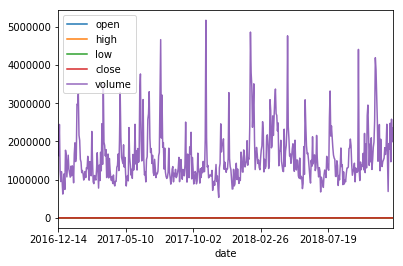

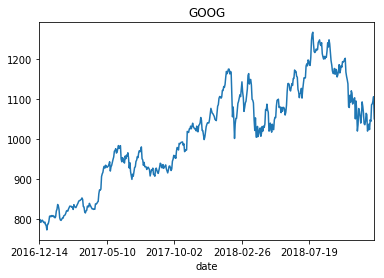

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot all variables
stock_data.plot()
plt.show()

#refining to show google at close over time as volume dominates the first chart
stock_data['close'].plot(title=ticker)

Typically averages are used often to determine a markets major trend, we're going to import the dow jones industrial average and then calculate the average to show how it's changed in the last two years.  This chart includes a calculation.

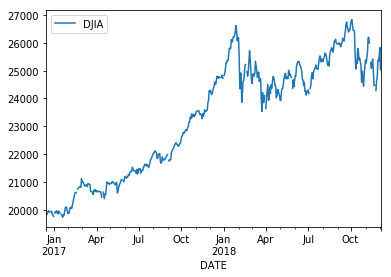

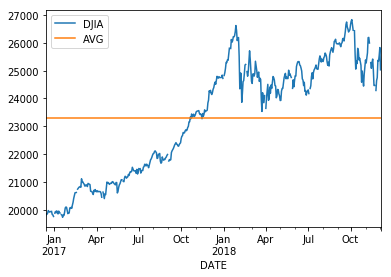

In [7]:
import numpy as np
import pandas as pd

#read in dow jones data from Fred
data = DataReader('DJIA', 'fred', start, end)

#dow jones over time
data.plot()
plt.show()

#adding in an average line
data.insert(1,'AVG',(np.sum(data.DJIA)/data.DJIA.count()))


#dow jones over time
data.plot()
plt.show()


In the next step we create an array for the dow jones industrial average and compare it to the previous day.  By doing this we determine the largest increases and decreases in the DJIA in the past two years

In [79]:
#Arrays 
import numpy 
x = numpy.array(DataReader('DJIA', 'fred', start, end))
y = numpy.array(DataReader('DJIA', 'fred', (start-timedelta(1)), (end-timedelta(1))))
 
#Matrix calculations
z = numpy.divide(x,y)

print('The Max daily positive change in the Dow Jones in the past 2 years is:',  (max(z)-1)*100)
print('The Max daily negative change in the down gones in the past 2 years is:',-((1-min(z))*100))

The Max daily positive change in the Dow Jones in the past 2 years is: [ 2.84449204]
The Max daily negative change in the down gones in the past 2 years is: [-4.60488163]


#### Part 3 : User defined functions and plotting multiple stocks at a time
Now that we can plot stock data let's move on to creating user defined functions.  Let's create a few functions that allows a user to input data and return a plot for a certain stock over a certain time period.  All the plots to date plot a single stock over time the goal for the next section is to plot multiple stocks, and then plot multiple stocks by percentage increase to see how they are performing in terms of growth.

Please enter a stock symbol: GOOG
Please enter a start date in YYYY-MM-DD format: 2018-01-01
Please enter an end date in YYYY-MM-DD format: 2018-10-01


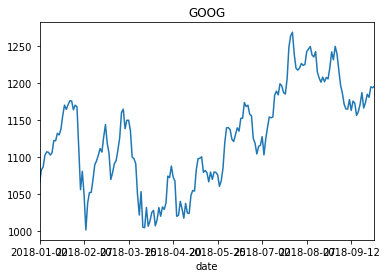

In [16]:
import pandas
from datetime import date,timedelta
from pandas_datareader import data, DataReader


#creating a function to pull data for a user input stock
while True:
    try:
         ticker = str(input("Please enter a stock symbol: "))
         start = str(input("Please enter a start date in YYYY-MM-DD format: "))
         end = str(input("Please enter an end date in YYYY-MM-DD format: "))
         data_source = 'iex'
         stock_data = DataReader(ticker,data_source,start,end)
         stock_data['close'].plot(title=ticker)
         break  
        
    except ValueError:
         print("Please enter a valid stock symbol and a date in YYYY-MM-DD format, e.g.: 2018-11-23")



            

Let's add in another function that allows the user to input and return results

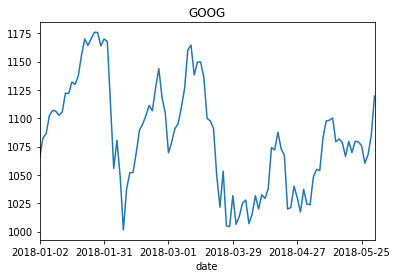

In [21]:
#creating a user defined function to do the same thing
def stock_chart(ticker,data_source, start, end):
         stock_data = DataReader(ticker,data_source,start,end)
         return stock_data['close'].plot(title=ticker) 

stock_chart('GOOG', 'iex', '2018-01-01', '2018-06-01')



Let us now uplevel this project by doing what you can't do with public data - compare two stocks at a time

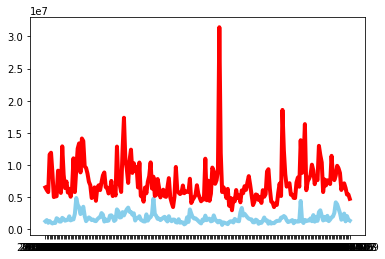

In [40]:
#comparing 2 stocks at a time
stock_data1 = DataReader('GOOG','iex','2018-01-01','2018-11-10')
stock_data2 = DataReader('NKE','iex','2018-01-01','2018-11-10')



plt.plot( 'volume',data=stock_data1, markersize=1, color='skyblue', linewidth=4)
plt.plot( 'volume',data=stock_data2, markersize=1, color='red', linewidth=4)



Comparing volumes is useful, but it's really not that helpful to the average investor.  Let's now create a function that normalizes the data in terms of percentage gain.  This function also includes conditional statements, transformations and calculations

In [22]:
#creating a function to compare stocks on percentage increase

%matplotlib inline
import matplotlib.pyplot as plt
from pandas_datareader import data, DataReader
def compare_various_stock_info(stock_list, data_source='iex',start='2018-01-01',end='2018-11-10',
                               compare_type='volume',convert_to_percentage=True):
    #comparing 2 stocks at a time
    for stock in stock_list:
        stock_data = DataReader(stock,data_source,start,end)
        if convert_to_percentage is True:
            stock_data[compare_type] = stock_data[compare_type].divide(stock_data[compare_type][0])
        plt.plot(compare_type,data=stock_data, markersize=1,  linewidth=4)
    plt.xlabel("Date") 
    if convert_to_percentage:
        plt.ylabel("comparing {} for {}, converted to percentage".format(compare_type, stock_list)) 
    else:
        plt.ylabel("comparing {} for {}".format(compare_type, stock_list)) 
    # TODO: set date format https://matplotlib.org/examples/api/date_demo.html

In [23]:
#creating a function to pull data for a user input stock
def run():
    tickers = str(input("Please enter stock symbols (seperated by ,): "))
    ticker_list = tickers.split(",")
    start = str(input("Please enter a start date in YYYY-MM-DD format: "))
    end = str(input("Please enter an end date in YYYY-MM-DD format: "))
    compare_type = str(input("enter content to compare (close, volume etc.):"))
    convert_to_percentage = int(input("enter conver to percentage or not (0 for false, 1 for true):"))
    convert_to_percentage = bool(convert_to_percentage)
    compare_various_stock_info(stock_list = ticker_list, start=start, end=end, compare_type=compare_type, convert_to_percentage=convert_to_percentage)

Please enter stock symbols (seperated by ,): GOOG,FB,MSFT
Please enter a start date in YYYY-MM-DD format: 2018-01-01
Please enter an end date in YYYY-MM-DD format: 2018-12-31
enter content to compare (close, volume etc.):close
enter conver to percentage or not (0 for false, 1 for true):1


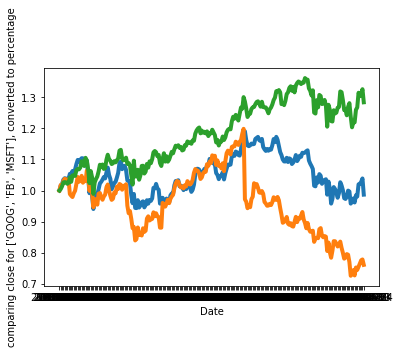

In [25]:
# compare_various_stock_info(['GOOG','FB', 'msft])
run()

#### Part 3 Summary:
As we can see more recently many of the stocks have decreased in total value, however microsoft has actually increased slightly


#### Part 4: Parsing financial statements to help build out the Owner Earning Formula
Being honest reading in stock market prices is helpful particularly given the fact we can plot multiple charts against one another, however to truely be able to make the call on investing in a company we have to at the very least undstand some of the fundamentals of the company.  We get these fundamentals from the financial statements

In [29]:
#to get this working you have to installl the iex python package https://pypi.org/project/iexfinance/

#setting up stock reader
from iexfinance import StockReader

#formatting financial data for google
a =  StockReader("GOOG")
Financial = a.get_financials(period = 'annual')
Financials = pandas.DataFrame.from_dict(Financials)

Financials.head()

,cashChange,cashFlow,costOfRevenue,currentAssets,currentCash,currentDebt,grossProfit,netIncome,operatingExpense,operatingGainsLosses,operatingIncome,operatingRevenue,reportDate,researchAndDevelopment,shareholderEquity,totalAssets,totalCash,totalDebt,totalLiabilities,totalRevenue
0,-2608000000,37091000000,45583000000,124308000000,10715000000,NaN,65272000000,12662000000,36390000000,194000000,28882000000,95375000000,2017-12-31,16625000000,152502000000,197295000000,101871000000,NaN,44793000000,110855000000
1,-3461000000,36036000000,35138000000,105408000000,12918000000,NaN,55134000000,19478000000,31418000000,275000000,23716000000,79383000000,2016-12-31,13948000000,139036000000,167497000000,86333000000,NaN,28461000000,90272000000
2,-1364000000,26024000000,28164000000,90114000000,16549000000,3.225000e+09,46825000000,16348000000,27465000000,334000000,19360000000,67390000000,2015-12-31,12282000000,120331000000,147461000000,73066000000,5.220000e+09,27130000000,74989000000
3,-118000000,22376000000,25691000000,78656000000,18347000000,2.009000e+09,40310000000,14444000000,23814000000,-1025000000,16496000000,59056000000,2014-12-31,9832000000,103860000000,129187000000,64395000000,5.237000e+09,25327000000,66001000000


Calculating Owner Earners: 
Calculating owner earnings is one of the many ways Rule 1 Investors (Warren Buffet) Evaluate stocks.  Calculating owner earnings is somewhat subjective, but Warren Buffets formula was broken down more recently in Invested (the book, but also in the podcas). The owner earnings formula we will work on calculating is below

Owner Earnings (taken from Invested)

+ Net Income
+ +Depreciation and Amortization
+ +Net Change: Accounts Receivable
+ +Net Change: Accounts Payable
+ +Income Tax
+ +Maintenance Capex

In [30]:
#Getting the cashflow statements will also require beautiful soup
import requests 
import re
import json
import numpy as np
from bs4 import BeautifulSoup



url = 'https://finance.yahoo.com/quote/AAPL/financials?p=AAPL'
html = requests.get(url).text
soup = BeautifulSoup(html,'html.parser')

soup_script = soup.find("script",text=re.compile("root.App.main")).text
script = soup.find("script",text=re.compile("root.App.main")).text

json_script = json.loads(re.search("root.App.main\s+=\s+(\{.*\})",soup_script)[1])
fin_data = json_script['context']['dispatcher']['stores']['QuoteSummaryStore']

cash_yr = fin_data['cashflowStatementHistory']['cashflowStatements']
cash_qtrs = fin_data['cashflowStatementHistoryQuarterly']['cashflowStatements']

cash_flow = pandas.DataFrame.from_dict(cash_yr)

df = pandas.DataFrame(cash_yr)

df
#cash_flow
#list(filter(lambda d: d["'raw'"] in keyValList, cash_yr))


,capitalExpenditures,changeInCash,changeToAccountReceivables,changeToInventory,changeToLiabilities,changeToNetincome,changeToOperatingActivities,depreciation,dividendsPaid,endDate,...,issuanceOfStock,maxAge,netBorrowings,netIncome,otherCashflowsFromFinancingActivities,otherCashflowsFromInvestingActivities,repurchaseOfStock,totalCashFromFinancingActivities,totalCashFromOperatingActivities,totalCashflowsFromInvestingActivities
0,"{'raw': -13313000000, 'fmt': '-13.31B', 'longF...","{'raw': 5624000000, 'fmt': '5.62B', 'longFmt':...","{'raw': -5322000000, 'fmt': '-5.32B', 'longFmt...","{'raw': 828000000, 'fmt': '828M', 'longFmt': '...","{'raw': 9131000000, 'fmt': '9.13B', 'longFmt':...","{'raw': -27694000000, 'fmt': '-27.69B', 'longF...","{'raw': 30057000000, 'fmt': '30.06B', 'longFmt...","{'raw': 10903000000, 'fmt': '10.9B', 'longFmt'...","{'raw': -13712000000, 'fmt': '-13.71B', 'longF...","{'raw': 1538179200, 'fmt': '2018-09-29'}",...,"{'raw': 669000000, 'fmt': '669M', 'longFmt': '...",1,"{'raw': 432000000, 'fmt': '432M', 'longFmt': '...","{'raw': 59531000000, 'fmt': '59.53B', 'longFmt...",NaN,"{'raw': -745000000, 'fmt': '-745M', 'longFmt':...","{'raw': -75265000000, 'fmt': '-75.27B', 'longF...","{'raw': -87876000000, 'fmt': '-87.88B', 'longF...","{'raw': 77434000000, 'fmt': '77.43B', 'longFmt...","{'raw': 16066000000, 'fmt': '16.07B', 'longFmt..."
1,"{'raw': -12451000000, 'fmt': '-12.45B', 'longF...","{'raw': -195000000, 'fmt': '-195M', 'longFmt':...","{'raw': -2093000000, 'fmt': '-2.09B', 'longFmt...","{'raw': -2723000000, 'fmt': '-2.72B', 'longFmt...","{'raw': 8340000000, 'fmt': '8.34B', 'longFmt':...","{'raw': 10640000000, 'fmt': '10.64B', 'longFmt...","{'raw': -8447000000, 'fmt': '-8.45B', 'longFmt...","{'raw': 10157000000, 'fmt': '10.16B', 'longFmt...","{'raw': -12769000000, 'fmt': '-12.77B', 'longF...","{'raw': 1506729600, 'fmt': '2017-09-30'}",...,"{'raw': 555000000, 'fmt': '555M', 'longFmt': '...",1,"{'raw': 29014000000, 'fmt': '29.01B', 'longFmt...","{'raw': 48351000000, 'fmt': '48.35B', 'longFmt...",NaN,"{'raw': -124000000, 'fmt': '-124M', 'longFmt':...","{'raw': -34774000000, 'fmt': '-34.77B', 'longF...","{'raw': -17974000000, 'fmt': '-17.97B', 'longF...","{'raw': 64225000000, 'fmt': '64.22B', 'longFmt...","{'raw': -46446000000, 'fmt': '-46.45B', 'longF..."
2,"{'raw': -12734000000, 'fmt': '-12.73B', 'longF...","{'raw': -636000000, 'fmt': '-636M', 'longFmt':...","{'raw': 527000000, 'fmt': '527M', 'longFmt': '...","{'raw': 217000000, 'fmt': '217M', 'longFmt': '...","{'raw': 563000000, 'fmt': '563M', 'longFmt': '...","{'raw': 9634000000, 'fmt': '9.63B', 'longFmt':...","{'raw': -902000000, 'fmt': '-902M', 'longFmt':...","{'raw': 10505000000, 'fmt': '10.51B', 'longFmt...","{'raw': -12150000000, 'fmt': '-12.15B', 'longF...","{'raw': 1474675200, 'fmt': '2016-09-24'}",...,"{'raw': 495000000, 'fmt': '495M', 'longFmt': '...",1,"{'raw': 22057000000, 'fmt': '22.06B', 'longFmt...","{'raw': 45687000000, 'fmt': '45.69B', 'longFmt...",NaN,"{'raw': -924000000, 'fmt': '-924M', 'longFmt':...","{'raw': -31292000000, 'fmt': '-31.29B', 'longF...","{'raw': -20890000000, 'fmt': '-20.89B', 'longF...","{'raw': 66231000000, 'fmt': '66.23B', 'longFmt...","{'raw': -45977000000, 'fmt': '-45.98B', 'longF..."
3,"{'raw': -11247000000, 'fmt': '-11.25B', 'longF...","{'raw': 7276000000, 'fmt': '7.28B', 'longFmt':...","{'raw': 417000000, 'fmt': '417M', 'longFmt': '...","{'raw': -238000000, 'fmt': '-238M', 'longFmt':...","{'raw': 6043000000, 'fmt': '6.04B', 'longFmt':...","{'raw': 5353000000, 'fmt': '5.35B', 'longFmt':...","{'raw': 5040000000, 'fmt': '5.04B', 'longFmt':...","{'raw': 11257000000, 'fmt': '11.26B', 'longFmt...","{'raw': -11561000000, 'fmt': '-11.56B', 'longF...","{'raw': 1443225600, 'fmt': '2015-09-26'}",...,"{'raw': 543000000, 'fmt': '543M', 'longFmt': '...",1,"{'raw': 29305000000, 'fmt': '29.3B', 'longFmt'...","{'raw': 53394000000, 'fmt': '53.39B', 'longFmt...","{'raw': 749000000, 'fmt': '749M', 'longFmt': '...","{'raw': -26000000, 'fmt': 